# My mushroom data classifier

## Technique
I will use a random forest model, and with that take various peices of user data to give my best guess as to if a mushroom is edible or not.

## Data
I will use a kaggle dataset for this

[Mushroom classification](https://www.kaggle.com/uciml/mushroom-classification) : UCI Machine Learning : CC0: Public Domain

## Plan
I will train this model, and then hopefully export it to another process where I will use it in a program to take user data, and then classify it.

In [4]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pickle

## Data preprocessing

In [5]:
# Importing the dataset

df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Using one of my FAVORITE sklearn tool for letter data
def le(x):
    LE = LabelEncoder()
    LE.fit(x)
    return LE.transform(x)

for c in df.columns:
    df[str(c)] = le(df[str(c)])

df.head()
# Now we have numerical data.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Model Time
Im going to use a random forest model, which has quickly become one of my favorite bagging type ML models. I have used it on a large project for the school of optometry recently, and just its ease of use alone has made me very prone to using it for simple binary classification problems!!

In [7]:
x = df.drop(['class'], axis=1)  #Dropping the labels!
y = df['class']                 #dropping the features!

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=25)   #Bigger dataset allows for more training margin

In [8]:
print(X_train.shape)
print(X_test.shape)

(6093, 22)
(2031, 22)


In [9]:
rf = RandomForestClassifier(max_depth=10, random_state=25) #6 and 25 are arbitrary here 
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=25)

In [10]:
y_pred = rf.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'F1: {metrics.f1_score(y_test, y_pred)}')

Accuracy: 1.0
F1: 1.0


## The result of 1.0
This is a concerning result, and could possibly be a case of over fitting, I will prune down until I get a result less than 1.


In [11]:
rf = RandomForestClassifier(max_depth=4, random_state=25) #4 is the lowest number that gives higher than .98, and 25 is arbitrary here 
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=25)

In [12]:
y_pred = rf.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'F1: {metrics.f1_score(y_test, y_pred)}')

Accuracy: 0.9901526341703595
F1: 0.9897435897435898


# Result
From this result of .989, we can see that our model is well suited for this application. 
After some revision, I settled on a useful model. The high accuracy and f1 score might indicate overfitting, however, I did some pruning to attempt to mitigate what overfitting there was.
(I started with clustering, and then desicion tree, and then finally remembered RFC! I cannot belive I didn't use this sooner!)

# Now what?
Now we can do some Feature selection on this particular model, and we can then export it with pickle or joblib!

## Feature Selection:
I am going to try feature importance for this particular model


[0.00614235 0.01601055 0.01216308 0.0919646  0.15872181 0.00403744
 0.06194581 0.13405124 0.03618294 0.05072477 0.05886366 0.04835679
 0.03476445 0.01158725 0.01521329 0.         0.00279755 0.02053048
 0.0939612  0.06270328 0.04472426 0.0345532 ]


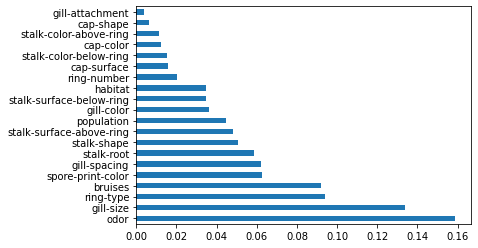

In [13]:
x1 = df.iloc[:, 1:]
y1 = df.iloc[:,0]

model = ExtraTreesClassifier()
model.fit(x1,y1)

print(model.feature_importances_)
ff = pd.Series(model.feature_importances_, index=x1.columns)
ff.nlargest(20).plot(kind='barh')
plt.show()

## selections:
This plot above shows the importance of features in this particular dataset. I want to try and limit it to as few as possible. I think I could get a very accurate result from the first 12 features on this list, but I want to narrow it down to less than 10 if possible.
I will try 3, then 5, then 7 and finally 12. I will stop if I can get an accuracy of 90+ and/or an f1 of 95+

## Model
I am still going to try and use discision trees/random forest classifier meathod, as it seemed to work extremely well.

In [14]:
df.columns
features3 = ['odor', 'gill-size', 'bruises']
features5 = ['ring-type', 'stalk-root']
features5.extend(features3)
features7 = ['gill-spacing', 'gill-color']
features7.extend(features5)
features12 = ['stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'spore-print-color', 'population']
features12.extend(features7)

dft = df['class']
df3 = df[features3]
df5 = df[features5]
df7 = df[features7]
df12 = df[features12]

In [15]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3, dft, test_size=.25, random_state=25)
X_train5, X_test5, y_train5, y_test5 = train_test_split(df5, dft, test_size=.25, random_state=25)
X_train7, X_test7, y_train7, y_test7 = train_test_split(df7, dft, test_size=.25, random_state=25)
X_train12, X_test12, y_train12, y_test12 = train_test_split(df12, dft, test_size=.25, random_state=25)

## Using 3 features alone
This is testing 3 features. if I get scores above 95 I will not continue with 5+

In [35]:
rf3 = RandomForestClassifier(max_depth=10, random_state=25) #6 and 25 are arbitrary here 
rf3.fit(X_train3.values, y_train3.values)

y_pred3 = rf3.predict(X_test3.values)
print(f'Accuracy: {metrics.accuracy_score(y_test3, y_pred3)}')
print(f'F1: {metrics.f1_score(y_test3, y_pred3)}')

Accuracy: 0.9857213195470211
F1: 0.985059247810407


## Result
This is astounding and very nice. This result means that we don't have to use more than 3 features!
I will use this to continue with pickling the modle

## Serialization
Now I will serialize the model, and download it as a .pkl file (or .sav file)

In [17]:
filename = 'mushroom_random_forest.pkl'
outfile = open(filename, 'wb')
pickle.dump(rf3, outfile)
outfile.close()

## Testing
Disregard the following cells, they are tests

In [52]:
x = rf3.predict([[5,4,5]])
if x == 0:
    print("no")
print(x)

[1]
